In [1]:
from ase import *
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.io import write, read
from ase.build.surface import fcc111, add_adsorbate
from ase.optimize import QuasiNewton
from ase.visualize import view
from IPython.display import Image

# Oxygen Reduction Reaction (ORR)

Oxygen reduction is essential for fuel cells and batteries as well as corrosion. Oxygen evolution takes place in a few industrial processes, such as the electrolysis of water. Both processes are slow processes and require a sizable overvoltage. For example, oxygen–hydrogen fuel cells deliver an open circuit voltage of the order of 0.80 V instead of the theoretical thermodynamic value of 1.23 V. The discovery of inexpensive and efficient catalysts for oxygen reduction is of great importance for fuel cells.

The reduction of O<sub>2</sub> to water involves four electrons:

O<sub>2</sub> + 4H<sup>+</sup> + 4e<sup>−</sup> ⇌ 2H<sub>2</sub>O

There is also a competing process of reduction to hydrogen peroxide:

O<sub>2</sub> + 2H<sup>+</sup> + 2e<sup>−</sup> ⇌ H<sub>2</sub>O<sub>2</sub>

Thus, the direct four-electron reduction competes with the indirect reduction via H<sub>2</sub>O<sub>2</sub>. The intermediate H<sub>2</sub>O<sub>2</sub> escapes into the solution or decomposes
catalytically on the electrode surface (reducing the efficiency).

On most metals, the rate-determining step is probably the transfer of the first electron:

O<sub>2</sub> + H<sup>+</sup> + e<sup>−</sup> → HO<sub>2(ad)</sub>

The development of computational methods allows for studying the thermodynamics of each step in a given sequence. For example:

<sup>1</sup>/<sub>2</sub>O<sub>2</sub> → O<sub>ad</sub>

O<sub>ad</sub> + H<sup>+</sup> + e<sup>−</sup> → HO<sub>(ad)</sub>

HO<sub>ad</sub> + H<sup>+</sup> + e<sup>−</sup> → H<sub>2</sub>O<sub>(ad)</sub>

Each step is a well-defined reaction. The electrode potential enters into the energy of the electrons transferred. The free energies of each reaction can be computed, yet the activation energies can not.

We will calculate the adsorption energy of an oxygen molecule on a platinum surface. This is done by calculating the total energy for the isolated slab and for the isolated molecule. The adsorbate is then added to the slab and relaxed, and the total energy for this composite system is calculated. The adsorption energy is obtained as the sum of the isolated energies minus the energy of the composite system.

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 13:01:35       10.539853        1.7840
BFGSLineSearch:    1[  2] 13:01:35       10.420277        0.7518
BFGSLineSearch:    2[  5] 13:01:36       10.308650        0.5956
BFGSLineSearch:    3[  6] 13:01:36       10.282012        0.4761
BFGSLineSearch:    4[  7] 13:01:36       10.266063        0.5720
BFGSLineSearch:    5[  8] 13:01:36       10.254887        0.2732
BFGSLineSearch:    6[ 11] 13:01:36       10.236761        0.2369
BFGSLineSearch:    7[ 12] 13:01:36       10.233681        0.0695
BFGSLineSearch:    8[ 13] 13:01:36       10.233299        0.0545
BFGSLineSearch:    9[ 15] 13:01:36       10.233033        0.0450

Adsorption energy: -0.88 eV

Relative energy: 1.59 eV


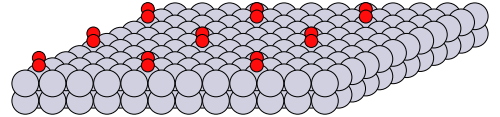

In [2]:
# distances
h = 2.10 #Pt–O
d = 1.21 #O–O in O2
b = 0.74 #H–H in H2

# define the Pt slab and calculate its energy
slab = fcc111('Pt', size=(4, 4, 2), vacuum=10.0)
slab.set_calculator(EMT())
e_slab = slab.get_potential_energy()

# define the H2 molecule and calcualte its energy
reference = Atoms('2H', positions=[(0., 0., 0.), (0., 0., b)])
reference.set_calculator(EMT())
e_H2 = reference.get_potential_energy()

# define the O2 molecule and calcualte its energy
molecule  = Atoms('2O', positions=[(0., 0., 0.), (0., d, 0.)])
molecule.set_calculator(EMT())
e_O2 = molecule.get_potential_energy()

# define the Pt–O2 adsorbtion complex and calcualte its energy
add_adsorbate(slab, molecule, h, 'fcc')
constraint = FixAtoms(mask=[a.symbol == 'Pt' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='O2Pt.traj')
dyn.run(fmax=0.05)
e_O2Pt = slab.get_potential_energy()

print '\n'+'Adsorption energy: ' + str(round(-((e_slab + e_O2 - e_O2Pt)),2)) + ' eV'
print '\n'+'Relative energy: ' + str(round(((e_slab + e_O2 - e_O2Pt)/2. + e_H2),2)) + ' eV'

write('O2Pt.png', slab * (3, 3, 1), rotation='-75x')
Image(filename='O2Pt.png')

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 13:01:36       10.385551        1.0380
BFGSLineSearch:    1[  2] 13:01:37       10.355635        0.1213
BFGSLineSearch:    2[  3] 13:01:37       10.355284        0.0161

Adsorption energy: -4.56 eV

Potential energy: 1.51 eV


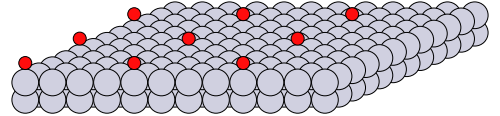

In [3]:
# define the Pt slab and calculate its energy
slab = fcc111('Pt', size=(4, 4, 2), vacuum=10.0)
slab.set_calculator(EMT())
e_slab = slab.get_potential_energy()

# define an O atom and calcualte its energy
molecule = Atoms('O', positions=[(0., 0., 0.)])
molecule.set_calculator(EMT())
e_O = molecule.get_potential_energy()

# redefine the Pt–O adsorbtion complex and calcualte its energy
add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol == 'Pt' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='OPt.traj')
dyn.run(fmax=0.05)
e_OPt = slab.get_potential_energy()

print '\n'+'Adsorption energy: ' + str(round(-(e_slab + e_O - e_OPt),2)) + ' eV'
print '\n'+'Potential energy: ' + str(round((e_slab + e_O2/2. - e_OPt + e_H2),2)) + ' eV'

write('OPt.png', slab * (3, 3, 1), rotation='-75x')
Image(filename='OPt.png')

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 13:01:37       11.591027        9.1524
BFGSLineSearch:    1[  2] 13:01:37       10.657688        1.0683
BFGSLineSearch:    2[  5] 13:01:37       10.416646        0.8509
BFGSLineSearch:    3[  6] 13:01:37       10.399915        0.4727
BFGSLineSearch:    4[  7] 13:01:37       10.394342        0.1159
BFGSLineSearch:    5[  8] 13:01:37       10.394073        0.0063

Adsorption energy: -2.23 eV

Potential energy: 0.89 eV


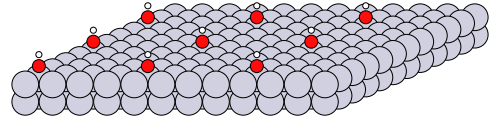

In [4]:
# distances
h = 2.10 #Pt–O
b = 0.96 #O–H in OH

slab = fcc111('Pt', size=(4, 4, 2), vacuum=10.0)

slab.set_calculator(EMT())
e_slab = slab.get_potential_energy()

molecule = Atoms('OH', positions=[(0., 0., 0.), (0., 0., b)])
molecule.set_calculator(EMT())
e_OH = molecule.get_potential_energy()

add_adsorbate(slab, molecule, h, 'fcc')
constraint = FixAtoms(mask=[a.symbol == 'Pt' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='OHPt.traj')
dyn.run(fmax=0.05)
e_OHPt = slab.get_potential_energy()

print '\n'+'Adsorption energy: ' + str(round(-(e_slab + e_OH - e_OHPt),2)) + ' eV'
print '\n'+'Potential energy: ' + str(round((e_slab + e_O2/2. - e_OHPt + e_H2/2.),2)) + ' eV'

write('OHPt.png', slab * (3, 3, 1), rotation='-75x')
Image(filename='OHPt.png')

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 13:01:37       13.024662       11.6979
BFGSLineSearch:    1[  2] 13:01:38       10.886750        1.5574
BFGSLineSearch:    2[  3] 13:01:38       10.717270        0.9689
BFGSLineSearch:    3[  5] 13:01:38       10.698197        0.0713
BFGSLineSearch:    4[  7] 13:01:38       10.697218        0.0436

Adsorption energy: -2.49 eV

Potential energy: 0.02 eV


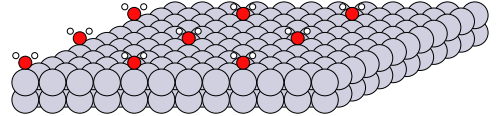

In [5]:
h = 2.10
z = 0.57
x = 0.76

slab = fcc111('Pt', size=(4, 4, 2), vacuum=10.0)

slab.set_calculator(EMT())
e_slab = slab.get_potential_energy()

molecule = Atoms('OH2', positions=[(0., 0., 0.), (-x, 0., z), (x, 0., z)])
molecule.set_calculator(EMT())
e_H2O = molecule.get_potential_energy()

add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol == 'Pt' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='H2OPt.traj')
dyn.run(fmax=0.05)
e_H2OPt = slab.get_potential_energy()

print '\n'+'Adsorption energy: ' + str(round(-(e_slab + e_H2O - e_H2OPt),2)) + ' eV'
print '\n'+'Potential energy: ' + str(round((e_slab + e_O2/2. - e_H2OPt),2)) + ' eV'

write('H2OPt.png', slab * (3, 3, 1), rotation='-75x')
Image(filename='H2OPt.png')

We can apply the same approach to any kind of alloy, for example, to an Pt–Ce alloy.

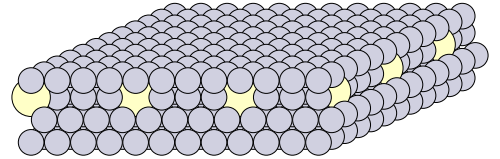

In [6]:
slab = fcc111('Pt', size=(4,4,4), vacuum=10.0)
#slab[32]
del slab[32]
Ce = Atom('Ce', [0.0, 1.6003332986183427, 14.526426110446668])
slab += Ce
#slab[38]
del slab[38]
Ce = Atom('Ce', [9.7015050378794321, 4.0008332465458567, 14.526426110446668])
slab += Ce
write('CePt.png', slab * (3, 3, 1), rotation='-75x')
Image(filename='CePt.png')

Our very rough estimations resemble the more precise results from DOI: 10.1021/jp047349j.